# ITS Plot Examples: Univariate vs Multivariate, Two vs Three Periods

This notebook illustrates the different plot options for multiple outcomes `Interrupted Time Series` (ITS) in CausalPy:

- **Two-period** design (permanent intervention: one treatment start) vs **three-period** design (temporary intervention: treatment start and end)
- For multivariate: **overlay** (all outcomes on the same axes) vs **per_outcome** (one figure per outcome)

All examples use the Bayesian (PyMC) workflow. Sampling uses reduced chains/draws so the notebook runs quickly.

## Summary: What each part does

- **1. Multivariate, two-period** : Several outcomes at once, each with its own formula, using `MultivarLinearReg`. Demonstrates two plot layouts: **overlay** (all outcomes on the same axes) and **per_outcome** (one figure per outcome, each with three panels).

- **2. Multivariate, three-period** : Same multivariate setup as above, but with a temporary intervention (start and end). Again shows overlay and per_outcome options.

- **3. Get plot data (DataFrame export)** : How to obtain the data behind the plots via `get_plot_data()`: for univariate ITS you get one DataFrame with time index, prediction, impact, and HDI columns; for multivariate you get a long-format DataFrame with an `outcome` column.

- **4. Proving we recover the covariance matrix** : Validation of `MultivarLinearReg`: we generate data from a known residual covariance (three outcomes), fit the model, and compare the posterior mean covariance to the true one (max absolute difference and mean squared error).

- **7. Summary** : How ``summary()`` works: it prints the formula, coefficients, and the effect summary table (per outcome in the multivariate case).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import causalpy as cp

seed = 42
# Fast sampling for demo (reduce for real analyses)
sample_kwargs = {
    "chains": 2,
    "draws": 200,
    "tune": 100,
    "progressbar": False,
    "random_seed": seed,
}

In [3]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## 1. Multivariate, two-period

Two outcomes with a list of formulas. We use `MultivarLinearReg` (supports multivariate). Plot API:

- **Default**: call `plot()` (or `plot(layout="overlay")`) — one figure, 3 panels, all outcomes on the same axes.
- **Per outcome**: call `plot(layout="per_outcome")` — one figure per outcome, each with 3 panels.
- Optionally pass `outcomes_to_plot=["y1", ...]` to show a subset of outcomes.

In [2]:
rng = np.random.default_rng(seed)
n = 72
dates = pd.date_range(start="2015-01-01", periods=n, freq="MS")
t = np.arange(n, dtype=float)
y1 = 10 + 0.3 * t + 2 * np.sin(2 * np.pi * np.arange(n) / 12) + rng.normal(0, 1, n)
y2 = 20 + 0.1 * t + rng.normal(0, 1.5, n)
df_multi = pd.DataFrame(
    {"y1": y1, "y2": y2, "t": t},
    index=dates,
)
df_multi.index.name = "obs_ind"
treatment_time_m = pd.to_datetime("2018-01-01")

result_multi_2p = cp.InterruptedTimeSeries(
    df_multi,
    treatment_time_m,
    formula=["y1 ~ 1 + t", "y2 ~ 1 + t"],
    model=cp.pymc_models.MultivarLinearReg(sample_kwargs=sample_kwargs),
)

c:\Users\jeanv\miniconda3\envs\CausalPy\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, chol_cov]
Sampling 2 chains for 100 tune and 200 draw iterations (200 + 400 draws total) took 35 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effect

C:\Users\jeanv\AppData\Local\Temp\ipykernel_12588\2607712260.py:4: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


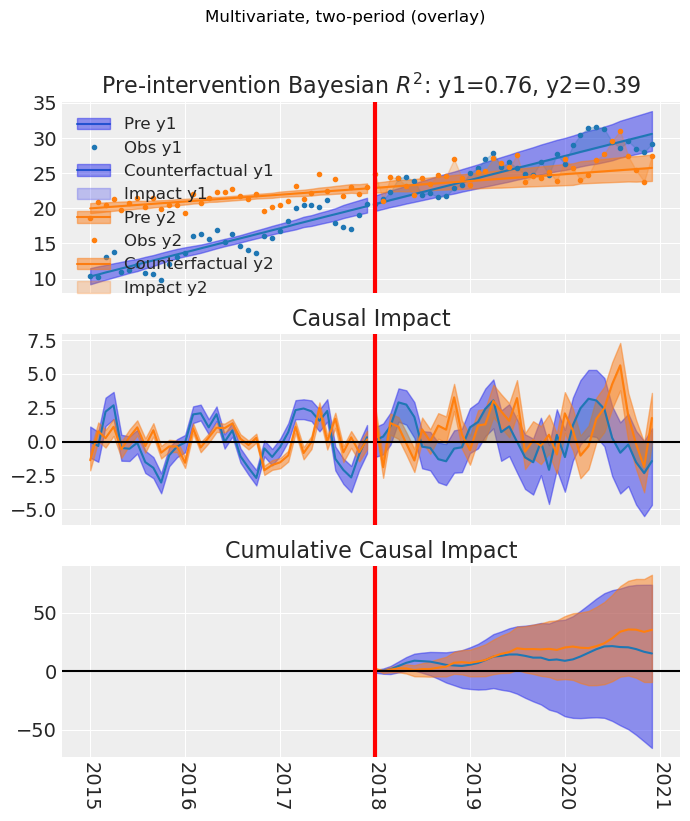

In [3]:
# Default: overlay (all outcomes on the same axes). Same as plot(layout="overlay")
fig, ax = result_multi_2p.plot()
fig.suptitle("Multivariate, two-period (overlay)", y=1.02)
fig.tight_layout()
plt.show()

### Inferred covariance matrix

`MultivarLinearReg` estimates a covariance matrix between outcomes (LKJ prior on the correlation and scale per outcome). Below we inspect the posterior mean covariance and the derived correlation matrix to show that the model correctly infers the residual dependence between y1 and y2.

C:\Users\jeanv\AppData\Local\Temp\ipykernel_7320\885547691.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


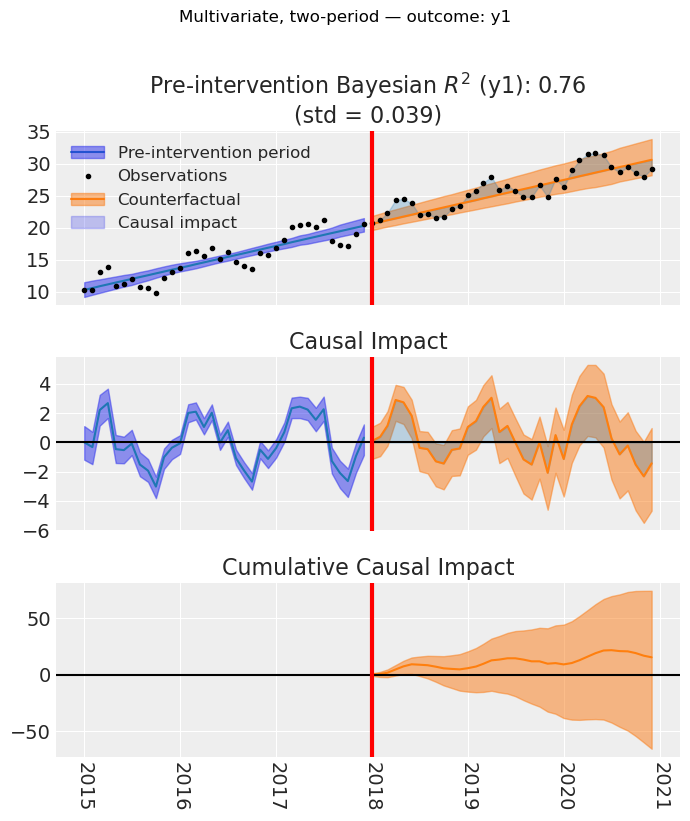

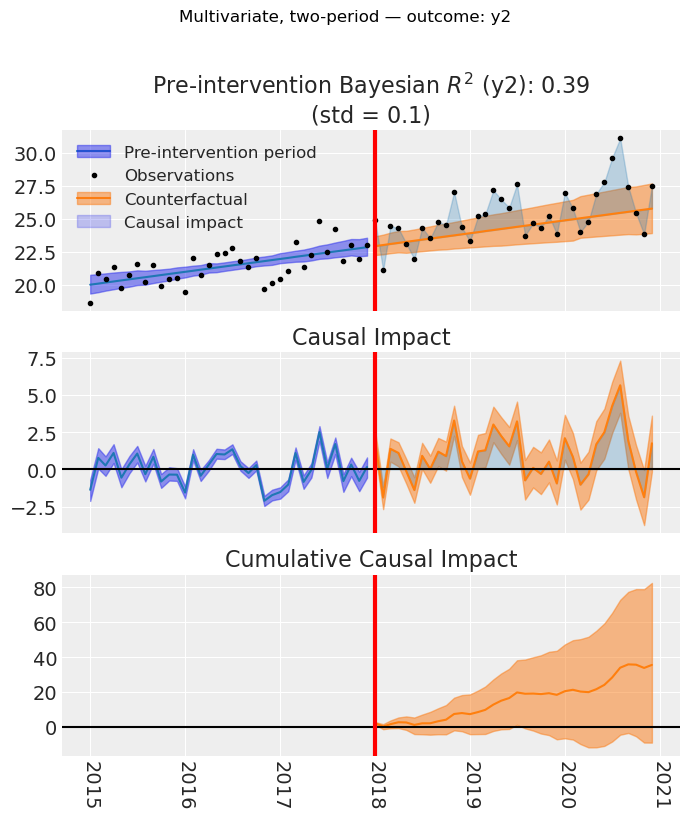

In [ ]:
# Layout per_outcome: one figure per outcome (returns a list of (fig, ax))
# One figure per outcome: pass layout="per_outcome"
figs = result_multi_2p.plot(layout="per_outcome")
for i, (fig, _ax) in enumerate(figs):
    fig.suptitle(
        f"Multivariate, two-period — outcome: {result_multi_2p.outcome_variable_names[i]}",
        y=1.02,
    )
    fig.tight_layout()
plt.show()

C:\Users\jeanv\AppData\Local\Temp\ipykernel_14100\1352864922.py:4: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


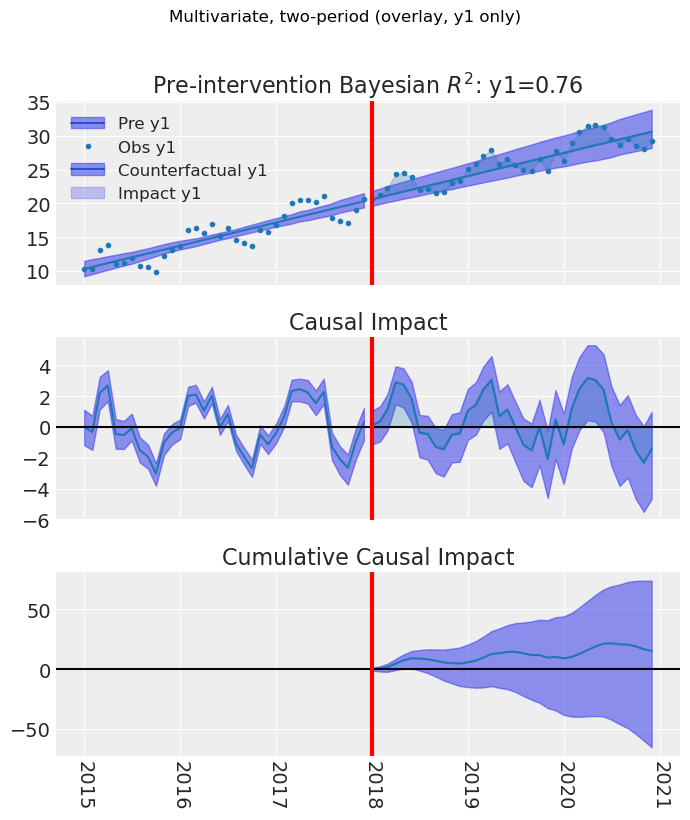

In [ ]:
# Optional: subset of outcomes (overlay). Default overlay + outcomes_to_plot
fig, ax = result_multi_2p.plot(outcomes_to_plot=["y1"])
fig.suptitle("Multivariate, two-period (overlay, y1 only)", y=1.02)
fig.tight_layout()
plt.show()

## 4. Multivariate, three-period

Multivariate ITS with temporary intervention: same overlay and per_outcome options, with treatment start and end lines on the plot.

c:\Users\jeanv\miniconda3\envs\CausalPy\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, chol_cov]
Sampling 2 chains for 100 tune and 200 draw iterations (200 + 400 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effect

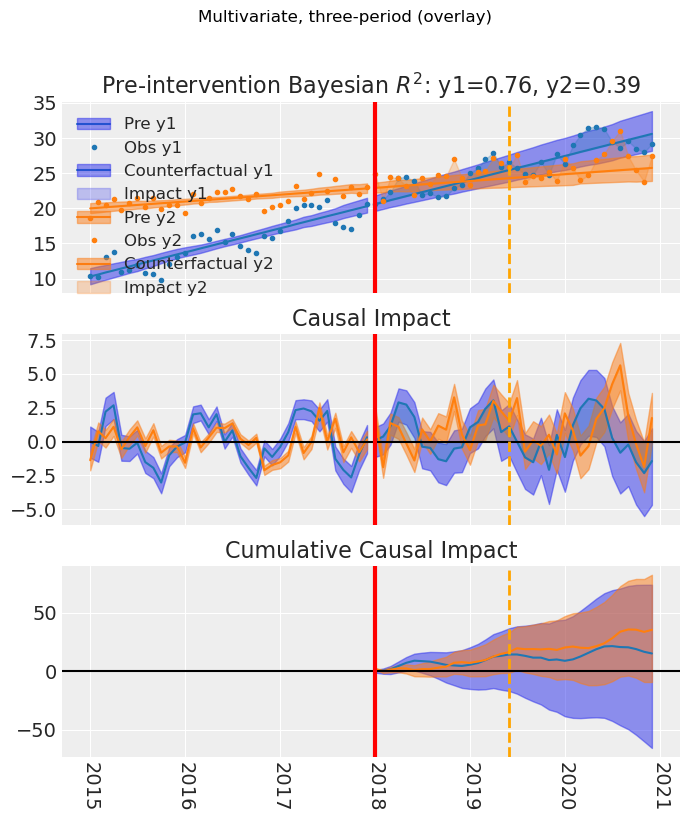

In [ ]:
treatment_end_time_m = pd.to_datetime("2019-06-01")

result_multi_3p = cp.InterruptedTimeSeries(
    df_multi,
    treatment_time_m,
    formula=["y1 ~ 1 + t", "y2 ~ 1 + t"],
    treatment_end_time=treatment_end_time_m,
    model=cp.pymc_models.MultivarLinearReg(sample_kwargs=sample_kwargs),
)
fig, ax = result_multi_3p.plot()  # default overlay
fig.suptitle("Multivariate, three-period (overlay)", y=1.02)
fig.tight_layout()
plt.show()

## 5. Get plot data (DataFrame export)

For univariate ITS, `get_plot_data()` returns a DataFrame with the time index, prediction, impact, and HDI columns. For multivariate, the DataFrame is in long format with an `outcome` column.

In [ ]:
# Multivariate: long format with outcome column
plot_data_multi = result_multi_2p.get_plot_data()
print("Multivariate columns:", list(plot_data_multi.columns))
print("Outcomes in data:", plot_data_multi["outcome"].unique().tolist())
plot_data_multi.head(10)

Multivariate columns: ['y1', 'y2', 't', 'outcome', 'prediction', 'pred_hdi_lower_94', 'pred_hdi_upper_94', 'impact', 'impact_hdi_lower_94', 'impact_hdi_upper_94']
Outcomes in data: ['y1', 'y2']


,y1,y2,t,outcome,prediction,pred_hdi_lower_94,pred_hdi_upper_94,impact,impact_hdi_lower_94,impact_hdi_upper_94
obs_ind,,,,,,,,,,
2015-01-01,10.304717,18.620822,0.0,y1,10.298209,9.191484,11.490822,0.006508,-1.065639,1.347100
2015-02-01,10.260016,20.845741,1.0,y1,10.584169,9.539022,11.750634,-0.324153,-1.354346,0.943285
2015-03-01,13.082502,20.413639,2.0,y1,10.870129,9.836503,11.938577,2.212373,1.224135,3.403732
2015-04-01,13.840565,21.335728,3.0,y1,11.156089,10.167732,12.176982,2.684475,1.738196,3.799754
2015-05-01,10.981016,19.759121,4.0,y1,11.442050,10.477895,12.392716,-0.461034,-1.364177,0.578165
2015-06-01,11.197820,20.737810,5.0,y1,11.728010,10.809258,12.628730,-0.530189,-1.391565,0.473865
2015-07-01,11.927840,21.538386,6.0,y1,12.013970,11.068768,12.802749,-0.086130,-0.905423,0.843753
2015-08-01,10.783757,20.235980,7.0,y1,12.299930,11.457413,13.099959,-1.516173,-2.284106,-0.637511
2015-09-01,10.651148,21.485163,8.0,y1,12.585890,11.794811,13.352568,-1.934742,-2.670125,-1.089803


## 6. Proving we recover the covariance matrix

To show that `MultivarLinearReg` correctly infers the residual covariance between outcomes, we generate a dataset with **three outcomes** whose residuals follow a **known** covariance matrix. We then fit the model and compare the posterior mean covariance to the true one. For this section we use **heavier sampling** (more chains, draws, tune) and **`target_accept=0.95`** so that NUTS takes smaller steps;

In [4]:
# True covariance matrix (3x3, positive definite) used to generate correlated residuals
# We choose a known structure: correlation + scale per outcome
true_corr = np.array(
    [
        [1.0, 0.6, 0.2],
        [0.6, 1.0, 0.5],
        [0.2, 0.5, 1.0],
    ]
)
true_std = np.array([1.2, 0.9, 1.0])  # standard deviations per outcome
true_cov = np.outer(true_std, true_std) * true_corr
outcome_names = ["y1", "y2", "y3"]

# Generate data: trend + correlated noise
n = 100
rng_cov = np.random.default_rng(seed)
t = np.linspace(0, 10, n)
# Mean structure: different intercept and slope per outcome
beta_true = np.array(
    [
        [1.0, 0.3],  # y1: intercept, slope
        [10.0, 0.1],  # y2
        [15.5, 0.2],  # y3
    ]
)
X = np.column_stack([np.ones(n), t])
mean_3d = X @ beta_true.T  # (n, 3)
# Correlated residuals from the known covariance; standardize so residual variance = 1 per outcome
# (reduces sampler geometry issues and we then compare inferred cov to true_corr)
residuals = rng_cov.multivariate_normal(np.zeros(3), true_cov, size=n)
residuals_std = residuals / residuals.std(axis=0) * true_std
y1 = mean_3d[:, 0] + residuals_std[:, 0]
y2 = mean_3d[:, 1] + residuals_std[:, 1]
y3 = mean_3d[:, 2] + residuals_std[:, 2]
# Treatment effect from t=50 onward
treatment_idx = 50
y1[treatment_idx:] += 20.0
y2[treatment_idx:] += 1.0
y3[treatment_idx:] -= 10

df_cov = pd.DataFrame(
    {"y1": y1, "y2": y2, "y3": y3, "t": t},
    index=np.arange(n),
)
df_cov.index.name = "obs_ind"
treatment_time_cov = 50.0  # corresponds to index ~50

# Heavier sampling + target_accept to avoid divergences (LKJ covariance has difficult geometry)
sample_kwargs_cov = {
    "chains": 4,
    "draws": 4000,
    "tune": 2000,
    "target_accept": 0.98,
    "progressbar": True,
    "random_seed": seed,
}

result_cov = cp.InterruptedTimeSeries(
    df_cov,
    treatment_time=treatment_time_cov,
    formula=["y1 ~ 1 + t", "y2 ~ 1 + t", "y3 ~ 1 + t"],
    model=cp.pymc_models.MultivarLinearReg(sample_kwargs=sample_kwargs_cov),
)

c:\Users\jeanv\miniconda3\envs\CausalPy\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, chol_cov]


Output()

Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 135 seconds.
Sampling: [beta, chol_cov, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


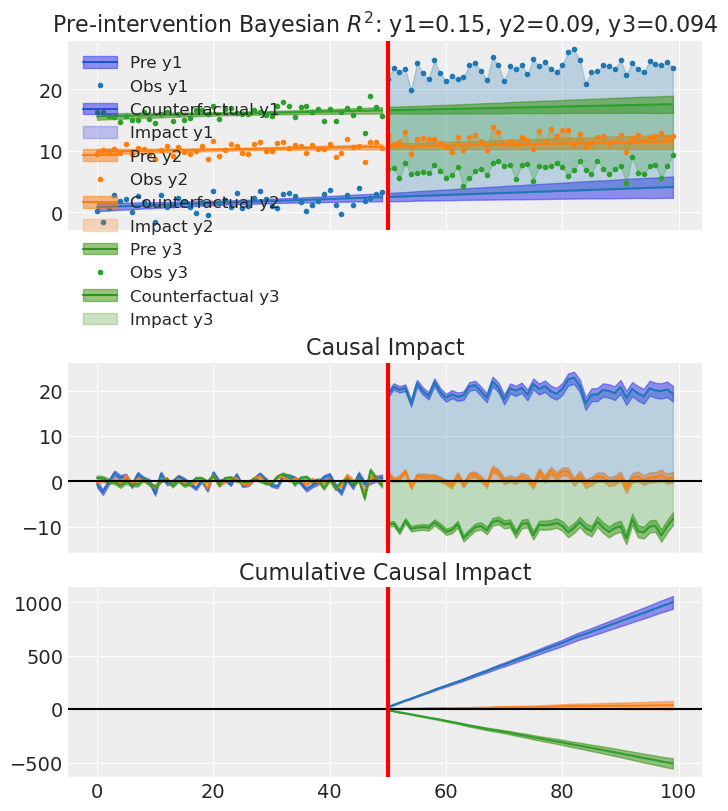

In [5]:
result_cov.plot()  # default overlay
plt.show()

In [6]:
# Compare true vs inferred covariance matrix
idata_cov = result_cov.model.idata
cov_post = idata_cov.posterior["cov"].mean(dim=["chain", "draw"]).values
if cov_post.ndim > 2:
    cov_post = cov_post.reshape(cov_post.shape[-2], cov_post.shape[-1])

# True residual cov = true_corr (we used standardized residuals, so unit variance)
true_cov_df = pd.DataFrame(true_cov, index=outcome_names, columns=outcome_names)
inferred_cov_df = pd.DataFrame(cov_post, index=outcome_names, columns=outcome_names)
diff_cov = inferred_cov_df - true_cov_df

print("True residual covariance (correlation matrix, from standardized residuals):")
display(true_cov_df)
print("Inferred posterior mean covariance matrix:")
display(inferred_cov_df)
print("Difference (inferred - true). Should be close to zero:")
display(diff_cov.round(4))
print("Max absolute difference: {:.4f}".format(np.abs(diff_cov.values).max()))
print("Mean squared error: {:.6f}".format(np.mean(diff_cov.values**2)))

True residual covariance (correlation matrix, from standardized residuals):


,y1,y2,y3
y1,1.440,0.648,0.24
y2,0.648,0.810,0.45
y3,0.240,0.450,1.00


Inferred posterior mean covariance matrix:


,y1,y2,y3
y1,1.551499,0.514865,0.086018
y2,0.514865,0.697577,0.539261
y3,0.086018,0.539261,1.016035


Difference (inferred - true). Should be close to zero:


,y1,y2,y3
y1,0.1115,-0.1331,-0.1540
y2,-0.1331,-0.1124,0.0893
y3,-0.1540,0.0893,0.0160


Max absolute difference: 0.1540
Mean squared error: 0.013793


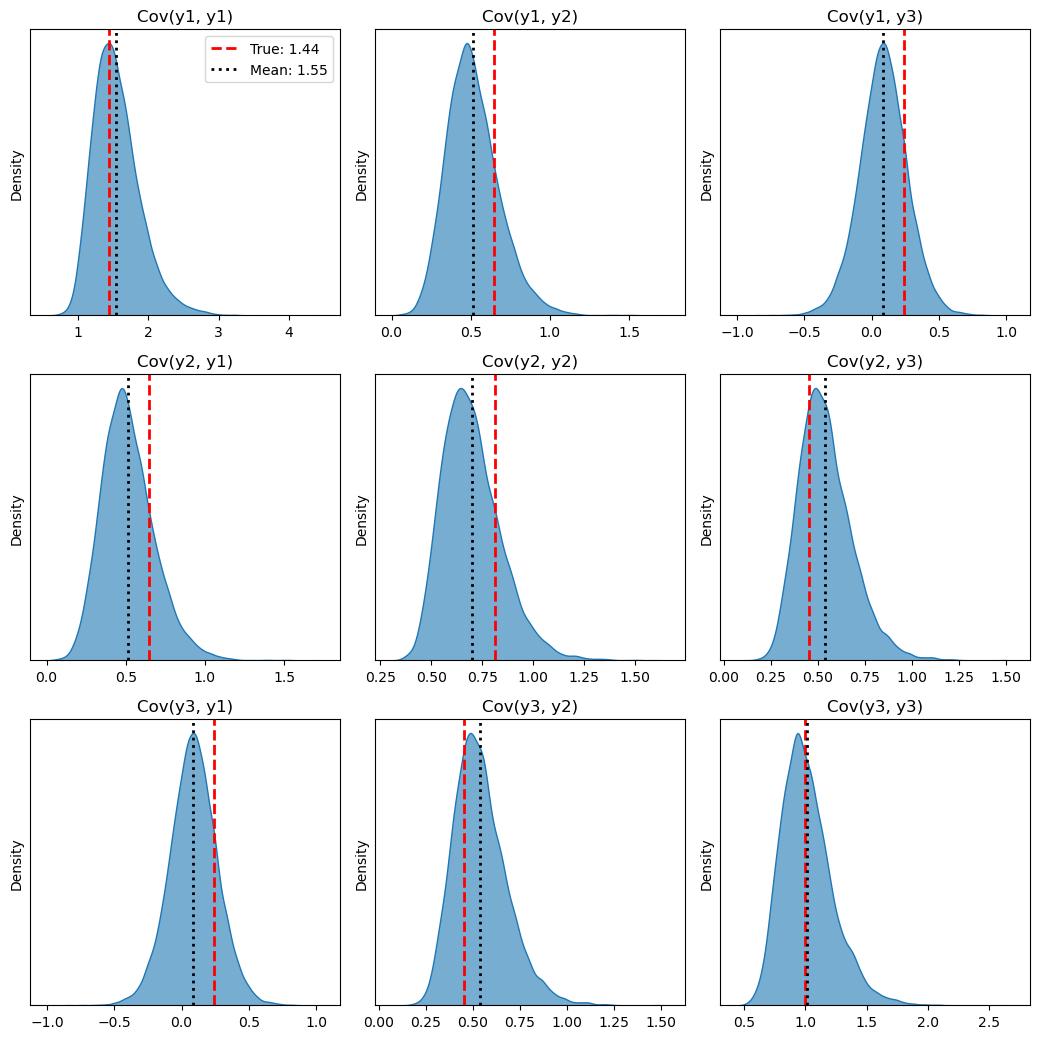

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extract all raw posterior samples for the 'cov' matrix
# The initial shape is usually (chains, draws, N, N)
cov_samples = idata_cov.posterior["cov"].values

# Flatten the chain and draw dimensions to pool all samples together
# New shape: (total_samples, N, N)
cov_samples_flat = cov_samples.reshape(-1, cov_samples.shape[-2], cov_samples.shape[-1])

n_outcomes = len(outcome_names)

# 2. Set up a grid of subplots (N x N)
fig, axes = plt.subplots(
    n_outcomes, n_outcomes, figsize=(3.5 * n_outcomes, 3.5 * n_outcomes)
)

# Handle the 1x1 case gracefully if there's only one outcome
if n_outcomes == 1:
    axes = np.array([[axes]])

# 3. Loop through each cell in the covariance matrix
for i in range(n_outcomes):
    for j in range(n_outcomes):
        ax = axes[i, j]

        # Extract the 1D array of samples for this specific (i, j) component
        cell_samples = cov_samples_flat[:, i, j]

        # Plot the posterior distribution
        sns.kdeplot(cell_samples, ax=ax, fill=True, color="C0", alpha=0.6)

        # Plot the true value as a vertical red dashed line
        true_val = true_cov[i, j]
        ax.axvline(
            true_val,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"True: {true_val:.2f}",
        )

        # Plot the inferred mean as a vertical black dotted line
        inferred_mean = cov_post[i, j]
        ax.axvline(
            inferred_mean,
            color="black",
            linestyle=":",
            linewidth=2,
            label=f"Mean: {inferred_mean:.2f}",
        )

        # Formatting
        ax.set_title(f"Cov({outcome_names[i]}, {outcome_names[j]})")
        ax.set_yticks([])  # Hide y-axis ticks for cleaner look

        # Only show the legend on the very first subplot to avoid clutter
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.show()

## 7. Summary: coefficients and effect summary

The ``summary()`` method prints the experiment type, formula, model coefficients, and an **effect summary** table (mean impact, HDI, cumulative effect, etc.). For multivariate ITS, the effect summary has one row per outcome and per statistic (average / cumulative), so you can read the causal effect for each outcome.

In [8]:
# Uses the multivariate two-period result from section 1
result_cov.summary()

==================================Pre-Post Fit==================================
Formula: ['y1 ~ 1 + t', 'y2 ~ 1 + t', 'y3 ~ 1 + t']
Model coefficients:

  Outcome: y1
    Intercept  0.86, 94% HDI [0.21, 1.5]
    t          0.33, 94% HDI [0.1, 0.55]

  Outcome: y2
    Intercept  9.9, 94% HDI [9.4, 10]
    t          0.16, 94% HDI [0.0099, 0.31]

  Outcome: y3
    Intercept  16, 94% HDI [15, 16]
    t          0.2, 94% HDI [0.017, 0.38]

  Residual covariance (upper triangle), 94% HDI:
  cov(y1, y1)  1.6, 94% HDI [1, 2.3]
  cov(y1, y2)  0.51, 94% HDI [0.24, 0.87]
  cov(y1, y3)  0.086, 94% HDI [-0.26, 0.43]
  cov(y2, y2)  0.7, 94% HDI [0.48, 1]
  cov(y2, y3)  0.54, 94% HDI [0.31, 0.85]
  cov(y3, y3)  1, 94% HDI [0.69, 1.5]

Effect summary:
  outcome   statistic         mean       median   hdi_lower    hdi_upper    p_gt_0  relative_mean  relative_hdi_lower  relative_hdi_upper
0      y1     average    20.038780    20.036233   18.789462    21.273351  1.000000     634.875454          369.626